In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/epitope-prediction-ws')  

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/training-Ovolvulus.csv


In [3]:
import pandas as pd 

# Importing the dataset
train_ovolvulus = pd.read_csv('./input/training-Ovolvulus.csv')

train_ovolvulus

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Info_epitope_id,Info_sourceOrg_id,Info_protein_id,Info_host_id,Info_n_Positive,Info_n_Negative,Info_TSeq_accver,Info_TSeq_taxid,Info_TSeq_orgname,Info_center_pos,Info_window_seq,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,...,feat_Perc_WA,feat_Perc_WC,feat_Perc_WD,feat_Perc_WE,feat_Perc_WF,feat_Perc_WG,feat_Perc_WH,feat_Perc_WI,feat_Perc_WK,feat_Perc_WL,feat_Perc_WM,feat_Perc_WN,feat_Perc_WP,feat_Perc_WQ,feat_Perc_WR,feat_Perc_WS,feat_Perc_WT,feat_Perc_WV,feat_Perc_WW,feat_Perc_WY,feat_Perc_YA,feat_Perc_YC,feat_Perc_YD,feat_Perc_YE,feat_Perc_YF,feat_Perc_YG,feat_Perc_YH,feat_Perc_YI,feat_Perc_YK,feat_Perc_YL,feat_Perc_YM,feat_Perc_YN,feat_Perc_YP,feat_Perc_YQ,feat_Perc_YR,feat_Perc_YS,feat_Perc_YT,feat_Perc_YV,feat_Perc_YW,feat_Perc_YY
0,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,1,LLLLLLLLDVHIESG,1,2.306891,79,165,17,35,0,1913.23,0.133333,0.266667,0.666667,0.066667,0.733333,0.266667,0.200000,0.066667,0.133333,-0.466667,-0.240000,-0.186667,-0.586667,-0.228000,-0.108667,-0.496667,-0.344667,-1.077333,0.125333,-0.198667,0.180667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,2,LLLLLLLDVHIESGE,1,2.463458,78,161,17,37,0,1929.19,0.133333,0.266667,0.600000,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.344000,-0.278000,-0.236667,-0.614000,-0.215333,-0.200000,-0.345333,-0.395333,-0.914000,0.064000,-0.122667,0.127333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,3,LLLLLLDVHIESGEV,1,2.606239,77,159,17,37,0,1915.17,0.133333,0.333333,0.600000,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.350667,-0.308667,-0.230000,-0.594000,-0.262667,-0.048000,-0.298667,-0.325333,-0.831333,-0.071333,-0.068000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,4,LLLLLDVHIESGEVC,1,2.866248,74,153,17,37,1,1905.16,0.200000,0.400000,0.533333,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.327333,-0.342000,-0.201333,-0.516667,-0.322000,-0.002000,-0.295333,-0.336000,-0.534000,-0.034000,-0.063333,0.112000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,5,LLLLDVHIESGEVCA,1,3.106891,71,147,17,37,1,1863.08,0.266667,0.466667,0.533333,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.331333,-0.394667,-0.164667,-0.551333,-0.433333,-0.050667,-0.240000,-0.361333,-0.449333,-0.111333,-0.018000,0.096000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66627,857110,6282,Q25619.1,"9606,9606",2,0,Q25619.1,6282,Onchocerca volvulus,29,SMSNIPEEYKEFIPE,1,2.973557,81,149,17,42,1,2065.20,0.133333,0.3

In [4]:
# Using only 1/4 of the dataset due to high RAM consumption
train_ovolvulus = train_ovolvulus.iloc[0:int(train_ovolvulus.shape[0]/4),:]
train_ovolvulus

,Info_epitope_id,Info_sourceOrg_id,Info_protein_id,Info_host_id,Info_n_Positive,Info_n_Negative,Info_TSeq_accver,Info_TSeq_taxid,Info_TSeq_orgname,Info_center_pos,Info_window_seq,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,...,feat_Perc_WA,feat_Perc_WC,feat_Perc_WD,feat_Perc_WE,feat_Perc_WF,feat_Perc_WG,feat_Perc_WH,feat_Perc_WI,feat_Perc_WK,feat_Perc_WL,feat_Perc_WM,feat_Perc_WN,feat_Perc_WP,feat_Perc_WQ,feat_Perc_WR,feat_Perc_WS,feat_Perc_WT,feat_Perc_WV,feat_Perc_WW,feat_Perc_WY,feat_Perc_YA,feat_Perc_YC,feat_Perc_YD,feat_Perc_YE,feat_Perc_YF,feat_Perc_YG,feat_Perc_YH,feat_Perc_YI,feat_Perc_YK,feat_Perc_YL,feat_Perc_YM,feat_Perc_YN,feat_Perc_YP,feat_Perc_YQ,feat_Perc_YR,feat_Perc_YS,feat_Perc_YT,feat_Perc_YV,feat_Perc_YW,feat_Perc_YY
0,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,1,LLLLLLLLDVHIESG,1,2.306891,79,165,17,35,0,1913.23,0.133333,0.266667,0.666667,0.066667,0.733333,0.266667,0.200000,0.066667,0.133333,-0.466667,-0.240000,-0.186667,-0.586667,-0.228000,-0.108667,-0.496667,-0.344667,-1.077333,0.125333,-0.198667,0.180667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,2,LLLLLLLDVHIESGE,1,2.463458,78,161,17,37,0,1929.19,0.133333,0.266667,0.600000,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.344000,-0.278000,-0.236667,-0.614000,-0.215333,-0.200000,-0.345333,-0.395333,-0.914000,0.064000,-0.122667,0.127333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,3,LLLLLLDVHIESGEV,1,2.606239,77,159,17,37,0,1915.17,0.133333,0.333333,0.600000,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.350667,-0.308667,-0.230000,-0.594000,-0.262667,-0.048000,-0.298667,-0.325333,-0.831333,-0.071333,-0.068000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,4,LLLLLDVHIESGEVC,1,2.866248,74,153,17,37,1,1905.16,0.200000,0.400000,0.533333,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.327333,-0.342000,-0.201333,-0.516667,-0.322000,-0.002000,-0.295333,-0.336000,-0.534000,-0.034000,-0.063333,0.112000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,854007,6282,A0A044QLL7,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,5,LLLLDVHIESGEVCA,1,3.106891,71,147,17,37,1,1863.08,0.266667,0.466667,0.533333,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.331333,-0.394667,-0.164667,-0.551333,-0.433333,-0.050667,-0.240000,-0.361333,-0.449333,-0.111333,-0.018000,0.096000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,856482,6282,A0A044U175,"9606,9606",1,1,NaN,6282,Onchocerca volvulus,218,TACIVDEDIEIHPFA,1,3.189898,74,141,17,39,1,1925.06,0.266667,0.533333,0.400000,0.133333,0.6

In [5]:
#Feature column names should start with *feat_*, and the class attribute should be called *Class*. All other columns
#are ignored when fitting the model. Based on https://github.com/fcampelo/epitopes/blob/master/R/fit_model.R

train_ovolvulus = train_ovolvulus.drop(["Info_epitope_id","Info_sourceOrg_id","Info_protein_id","Info_host_id","Info_n_Positive", "Info_n_Negative", "Info_TSeq_accver", "Info_TSeq_taxid", "Info_TSeq_orgname", "Info_center_pos", "Info_window_seq"],axis =1)
train_ovolvulus

,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,feat_F2,feat_F3,feat_F4,feat_F5,...,feat_Perc_WA,feat_Perc_WC,feat_Perc_WD,feat_Perc_WE,feat_Perc_WF,feat_Perc_WG,feat_Perc_WH,feat_Perc_WI,feat_Perc_WK,feat_Perc_WL,feat_Perc_WM,feat_Perc_WN,feat_Perc_WP,feat_Perc_WQ,feat_Perc_WR,feat_Perc_WS,feat_Perc_WT,feat_Perc_WV,feat_Perc_WW,feat_Perc_WY,feat_Perc_YA,feat_Perc_YC,feat_Perc_YD,feat_Perc_YE,feat_Perc_YF,feat_Perc_YG,feat_Perc_YH,feat_Perc_YI,feat_Perc_YK,feat_Perc_YL,feat_Perc_YM,feat_Perc_YN,feat_Perc_YP,feat_Perc_YQ,feat_Perc_YR,feat_Perc_YS,feat_Perc_YT,feat_Perc_YV,feat_Perc_YW,feat_Perc_YY
0,1,2.306891,79,165,17,35,0,1913.23,0.133333,0.266667,0.666667,0.066667,0.733333,0.266667,0.200000,0.066667,0.133333,-0.466667,-0.240000,-0.186667,-0.586667,-0.228000,-0.108667,-0.496667,-0.344667,-1.077333,0.125333,-0.198667,0.180667,0.583333,-1.781333,-1.117333,-0.772000,-0.750667,0.522667,0.411667,0.562933,0.183867,1.162267,0.196600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.463458,78,161,17,37,0,1929.19,0.133333,0.266667,0.600000,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.344000,-0.278000,-0.236667,-0.614000,-0.215333,-0.200000,-0.345333,-0.395333,-0.914000,0.064000,-0.122667,0.127333,0.513333,-1.288667,-1.013333,-0.680000,-0.905333,0.450000,0.241733,0.580267,0.112933,1.049533,0.189133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2.606239,77,159,17,37,0,1915.17,0.133333,0.333333,0.600000,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.350667,-0.308667,-0.230000,-0.594000,-0.262667,-0.048000,-0.298667,-0.325333,-0.831333,-0.071333,-0.068000,0.066667,0.494667,-1.176000,-1.102667,-0.683333,-0.914000,0.392667,0.072933,0.541400,0.068000,0.991000,0.138133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2.866248,74,153,17,37,1,1905.16,0.200000,0.400000,0.533333,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.327333,-0.342000,-0.201333,-0.516667,-0.322000,-0.002000,-0.295333,-0.336000,-0.534000,-0.034000,-0.063333,0.112000,0.506000,-0.834667,-1.127333,-0.334000,-0.854000,0.160000,0.059400,0.467600,-0.073467,0.725400,0.049133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3.106891,71,147,17,37,1,1863.08,0.266667,0.466667,0.533333,0.066667,0.666667,0.333333,0.266667,0.066667,0.200000,-0.331333,-0.394667,-0.164667,-0.551333,-0.433333,-0.050667,-0.240000,-0.361333,-0.449333,-0.111333,-0.018000,0.096000,0.412000,-0.533333,-1.195333,-0.194667,-0.815333,0.190667,-0.006800,0.447133,-0.187600,0.690933,0.017600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,1,3.189898,74,141,17,39,1,1925.06,0.266667,0.533333,0.400000,0.133333,0.600000,0.400000,0.333333,0.066667,0.266667,-0.200000,-0.406667,-0.250667,-0.398000,-0.334

In [6]:
#checking for null values. 
train_ovolvulus.isnull().sum()

Class               0
feat_seq_entropy    0
feat_C_atoms        0
feat_H_atoms        0
feat_N_atoms        0
                   ..
feat_Perc_YS        0
feat_Perc_YT        0
feat_Perc_YV        0
feat_Perc_YW        0
feat_Perc_YY        0
Length: 846, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


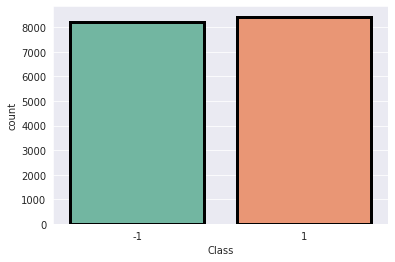

In [7]:
import seaborn as sns #visualization
# checking number of positves and negatives
sns.set_style('darkgrid')
sns.countplot(train_ovolvulus['Class'],linewidth=3,palette="Set2",edgecolor='black')

In [8]:
train_ovolvulus.Class.value_counts()

 1    8430
-1    8228
Name: Class, dtype: int64

In [9]:
# Install conda on google colab 
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-10-24 22:39:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.8’

Miniconda3-py37_4.8 100%[===================>]  81.12M  80.7MB/s    in 1.0s    

2021-10-24 22:39:32 (80.7 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.8’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directorie

In [10]:
# Creating a conda environment to avoid conflicts between libs

# create a conda environment
!conda create --name pycaret python=3.8

Remove existing environment (y/[n])? y

Solving environment: \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/pycaret

  added / updated specs:
    - python=3.8


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-4.5-1_gnu
  ca-certificates    pkgs/main/linux-64::ca-certificates-2021.9.30-h06a4308_1
  certifi            pkgs/main/linux-64::certifi-2021.10.8-py38h06a4308_0
  ld_impl_linux-64   pkgs/main/linux-64::ld_impl_linux-64-2.35.1-h7274673_9
  libffi             pkgs/main/linux-64::libffi-3.3-he6710b0_2
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-9.3.0-h5101ec6_17
  libgomp            pkgs/main/linux-64::libgomp-9.3.0-h5101ec6_17
  libstdcxx-ng       pkgs/main/

In [11]:
!source /usr/local/etc/profile.d/conda.sh

In [12]:
!conda init bash

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


In [13]:
!source /root/.bashrc


In [14]:
# activate conda environment
!conda activate pycaret


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [15]:
# install pycaret
!pip install pycaret[full]

In [16]:
!pip uninstall lightgbm -y

Found existing installation: lightgbm 3.3.0
Uninstalling lightgbm-3.3.0:
  Successfully uninstalled lightgbm-3.3.0


In [17]:
!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

/usr/local/lib/python3.7/site-packages/pip/_internal/commands/install.py:244: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
  Using cached lightgbm-3.3.0.tar.gz (1.5 MB)
Skipping wheel build for lightgbm, due to binaries being disabled for it.
    Running setup.py install for lightgbm ... done


In [18]:
# install pycaret
# install pycaret on blazingSQL
!python3 -m pip install --upgrade pycaret


Requirement already up-to-date: pycaret in /usr/local/lib/python3.7/site-packages (2.3.4)


In [19]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_ovolvulus, test_size=0.1,random_state= 27)

In [20]:
from pycaret.classification import *

# By default, 70% of the data will be used for training  and validation. The remaining data will be used for a test / hold-out set
experiment = setup(
     data = train 
    ,target = 'Class'
  #  ,ignore_features = ['parent_protein_id', 'protein_seq', 'peptide_seq']
    ,normalize = True
    ,use_gpu = True
)

,Description,Value
0,session_id,5665
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14992, 846)"
5,Missing Values,False
6,Numeric Features,485
7,Categorical Features,360
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
# Check if the methods are using GPU
# pycaret lib is not able to use GPU on Colab (open an issue on github !)
models(internal=True)[['Name', 'GPU Enabled']]

,Name,GPU Enabled
ID,,
lr,Logistic Regression,False
knn,K Neighbors Classifier,False
nb,Naive Bayes,False
dt,Decision Tree Classifier,False
svm,SVM - Linear Kernel,False
rbfsvm,SVM - Radial Kernel,False
gpc,Gaussian Process Classifier,False
mlp,MLP Classifier,False
ridge,Ridge Classifier,False


In [22]:
# comparatoin between models
#default CV = 10 Folds
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7796,0.8854,0.7889,0.7790,0.7838,0.5590,0.5593,11.805
ridge,Ridge Classifier,0.7767,0.0000,0.7943,0.7716,0.7827,0.5532,0.5536,0.224
lda,Linear Discriminant Analysis,0.7766,0.8669,0.7939,0.7716,0.7826,0.5530,0.5534,2.102
lr,Logistic Regression,0.7760,0.8682,0.7921,0.7716,0.7816,0.5517,0.5520,5.823
catboost,CatBoost Classifier,0.7683,0.8776,0.7853,0.7640,0.7744,0.5364,0.5367,19.747
lightgbm,Light Gradient Boosting Machine,0.7621,0.8701,0.7781,0.7584,0.7681,0.5239,0.5241,2.107
gbc,Gradient Boosting Classifier,0.7593,0.8447,0.8054,0.7416,0.7721,0.5180,0.5202,25.930
nb,Naive Bayes,0.7419,0.7887,0.7589,0.7390,0.7487,0.4836,0.4840,0.140
svm,SVM - Linear Kernel,0.7375,0.0000,0.7387,0.7549,0.7339,0.4749,0.4897,2.718
ada,Ada Boost Classifier,0.7345,0.8175,0.7678,0.7245,0.7454,0.4685,0.4695,5.248


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
from sklearn.metrics import roc_auc_score

# choose the knn as best model since it has the highest F1
best_model = ['knn']

df_Results = pd.DataFrame(columns=['Classification', 'Dataset', 'Model', 'AUC'])

for m in best_model:
    print('-----------------------------------------------------')
    print('[START] - Processing model: ', m)
    print('-----------------------------------------------------')
    
    mo = create_model(m)
        
    mo_pred = predict_model(mo, test)
    mo_pred.dropna(inplace=True)
    
    try:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Model', roc_auc_score(mo_pred['target'], mo_pred['Label'])]
    except:
        df_Results.loc[len(df_Results)] = [m, 'Valid', 'Model', 'NA']
    
    print('-----------------------------------------------------')
    print('[FINISHED] - Model: ', m)
    print('-----------------------------------------------------')
    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7819,0.0,0.7932,0.7800,0.7866,0.5636,0.5637
1,0.7867,0.0,0.8008,0.7831,0.7918,0.5731,0.5733
2,0.7771,0.0,0.7914,0.7739,0.7825,0.5541,0.5542
3,0.7533,0.0,0.7556,0.7571,0.7563,0.5066,0.5066
4,0.7827,0.0,0.8154,0.7691,0.7916,0.5649,0.5660
5,0.7750,0.0,0.7966,0.7677,0.7819,0.5498,0.5502
6,0.7874,0.0,0.7966,0.7862,0.7914,0.5747,0.5747
7,0.7626,0.0,0.7947,0.7509,0.7722,0.5248,0.5258
8,0.7846,0.0,0.7928,0.7840,0.7884,0.5690,0.5690
9,0.7760,0.0,0.8060,0.7643,0.7846,0.5516,0.5524


-----------------------------------------------------
[FINISHED] - Model:  ridge
-----------------------------------------------------


In [24]:
x=train.drop(['Class'], axis=1 )
y=train['Class']

In [25]:
x

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,feat_F2,feat_F3,feat_F4,feat_F5,feat_F6,...,feat_Perc_WA,feat_Perc_WC,feat_Perc_WD,feat_Perc_WE,feat_Perc_WF,feat_Perc_WG,feat_Perc_WH,feat_Perc_WI,feat_Perc_WK,feat_Perc_WL,feat_Perc_WM,feat_Perc_WN,feat_Perc_WP,feat_Perc_WQ,feat_Perc_WR,feat_Perc_WS,feat_Perc_WT,feat_Perc_WV,feat_Perc_WW,feat_Perc_WY,feat_Perc_YA,feat_Perc_YC,feat_Perc_YD,feat_Perc_YE,feat_Perc_YF,feat_Perc_YG,feat_Perc_YH,feat_Perc_YI,feat_Perc_YK,feat_Perc_YL,feat_Perc_YM,feat_Perc_YN,feat_Perc_YP,feat_Perc_YQ,feat_Perc_YR,feat_Perc_YS,feat_Perc_YT,feat_Perc_YV,feat_Perc_YW,feat_Perc_YY
16335,3.189898,81,158,18,37,2,2040.34,0.200000,0.333333,0.266667,0.133333,0.533333,0.466667,0.266667,0.133333,0.133333,-0.128667,-0.192000,-0.052000,-0.289333,0.031333,-0.204667,-0.112000,0.010000,-0.466000,0.141333,-0.035333,0.260000,0.072667,-0.512000,-0.079333,0.022667,-0.416667,0.132000,0.138733,0.355200,0.099133,0.324800,0.000133,-0.085400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9019,2.098930,58,117,17,33,0,1580.66,0.400000,0.866667,0.066667,0.000000,0.800000,0.200000,0.133333,0.066667,0.066667,-0.522667,-0.616667,0.130667,1.191333,-0.840667,-0.717333,-0.130667,0.438000,-0.327333,0.578000,-0.160000,-0.226667,-0.059333,0.570000,-1.245333,0.762667,-0.156667,0.874667,-0.455000,-1.466200,-0.867733,0.431133,1.140133,-0.878533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13347,1.781937,61,128,18,30,0,1593.79,0.400000,0.800000,0.066667,0.000000,0.800000,0.200000,0.200000,0.200000,0.000000,-0.561333,-0.524000,0.356000,1.138667,-0.732667,-0.647333,-0.031333,0.631333,-0.592667,0.776667,-0.154667,-0.339333,0.129333,0.493333,-1.222000,0.398000,0.295333,0.822000,-0.494733,-1.385733,-0.787867,0.517533,1.137533,-0.633800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5926,3.373557,87,152,18,38,1,2090.31,0.133333,0.400000,0.133333,0.266667,0.600000,0.400000,0.266667,0.133333,0.133333,-0.073333,-0.178000,-0.094000,0.233333,0.164000,-0.167333,-0.038667,0.366667,-0.510667,0.046667,0.176667,0.045333,0.150000,-0.411333,0.258667,0.080667,-0.217333,0.048667,-0.230067,-0.171867,0.216400,0.170067,0.035933,-0.129800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8168,2.689246,74,165,27,31,1,1961.34,0.266667,0.600000,0.333333,0.000000,0.533333,0.466667,0.400000,0.400000,0.000000,-0.166000,-0.168667,0.439333,-0.080000,-0.096667,0.464000,0.470000,0.007333,-0.383333,0.330667,-0.522000,0.022667,0.420667,0.560667,-0.380000,-1.005333,0.515333,0.260667,-0.751933,0.108133,-0.179000,0.258133,0.385867,0.828800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

SEED = 7
params = {'n_estimators': 800, 'max_depth': 3, 'subsample': 0.8, 'max_features' : 'sqrt', 
          'learning_rate': 0.019, 'min_samples_split': 2, 'random_state': SEED}

# GBM
clf = GradientBoostingClassifier(**params)
clf.fit(x, y)
gbm_importance = clf.feature_importances_
gbm_ranked_indices = np.argsort(clf.feature_importances_)[::-1]

In [39]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=7)
rf.fit(x, y)
rf_importance = rf.feature_importances_
rf_ranked_indices = np.argsort(rf.feature_importances_)[::-1]

In [42]:
# printing results in a table
importance_results = pd.DataFrame(index=range(1,16), 
                                  columns=pd.MultiIndex.from_product([['GBM','RF'],['Feature #','Importance']]))
importance_results.index.name = 'Rank'
importance_results.loc[:,'GBM'] =  list(zip(gbm_ranked_indices[:15], 
                                            gbm_importance[gbm_ranked_indices[:15]]))
importance_results.loc[:,'RF'] =  list(zip(rf_ranked_indices[:15], 
                                           rf_importance[rf_ranked_indices[:15]]))
print (importance_results)

           GBM                   RF           
     Feature # Importance Feature # Importance
Rank                                          
1           53   0.060720        49   0.025602
2           39   0.038268        69   0.025010
3           49   0.033937        53   0.024263
4           17   0.033235        39   0.021971
5            4   0.032101        17   0.017740
6           69   0.027206        80   0.015685
7           32   0.025331        34   0.015149
8           21   0.024081        29   0.014801
9          428   0.023640        21   0.014154
10          80   0.023440         4   0.013842
11          34   0.020202        65   0.012946
12          45   0.019880        45   0.012802
13          36   0.015985        32   0.012650
14          75   0.015510       428   0.011518
15         740   0.013195        75   0.011308


In [46]:
columns = x.columns
coefficients = rf.feature_importances_.reshape(x.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Feature Importance:')
print('\n',fullList,'\n')

RandomForestClassifier - Feature Importance:

          Variable  absCoefficient
49     feat_VHSE5        0.025602
69   feat_BLOSUM1        0.025010
53   feat_ProtFP1        0.024263
39        feat_F6        0.021971
17       feat_PP2        0.017740
..            ...             ...
335    feat_CT511        0.000000
543  feat_Perc_FW        0.000000
142    feat_CT114        0.000000
663  feat_Perc_MW        0.000000
188    feat_CT211        0.000000

[845 rows x 2 columns] 



In [47]:
columns = x.columns
coefficients = clf.feature_importances_.reshape(x.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('GradientBoostingClassifier - Feature Importance:')
print('\n',fullList,'\n')

GradientBoostingClassifier - Feature Importance:

          Variable  absCoefficient
53   feat_ProtFP1        0.060720
39        feat_F6        0.038268
49     feat_VHSE5        0.033937
17       feat_PP2        0.033235
4    feat_O_atoms        0.032101
..            ...             ...
700  feat_Perc_PS        0.000000
463  feat_Perc_AW        0.000000
705  feat_Perc_QA        0.000000
279    feat_CT401        0.000000
464  feat_Perc_AY        0.000000

[845 rows x 2 columns] 

